In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from training import Experiment
import os
from datetime import datetime
import pickle


#dict is a dictornary with the labels you want to assign
plt.figure(figsize=(16,10)  , dpi=70)
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0))

exp = Experiment(number_phases=2, layers=2, resolution=0.1, bound_displacements=1, save_tables=True)
exp.load_data("run_3",tables=True)
# run_color = tuple(np.random.randint(256, size=3)/256)


2L2PH0.1R
run_3
successfully loaded the tables :)


In [2]:
from basics import Basics
bb = Basics(resolution=exp.resolution, bound_displacements=exp.bound_displacements)
bb.define_actions()

last = exp.n_table_evolution[-1]
lastq = exp.q_table_evolution[-1]
l0most = np.where(last[0] == np.max(last[0]))[0][0]
l10most = np.where(last[1][0][l0most,:] == np.max(last[1][0][l0most,:]))[0][0]
l11most = np.where(last[1][1][l0most,:] == np.max(last[1][1][l0most,:]))[0][0]

ql0most = np.where(lastq[0] == np.max(lastq[0]))[0][0]
q10most = np.where(lastq[1][0][ql0most,:] == np.max(lastq[1][0][ql0most,:]))[0][0]
q11most = np.where(lastq[1][1][ql0most,:] == np.max(lastq[1][1][ql0most,:]))[0][0]

In [3]:
guess = exp.q_table_guess_evolution[-1]
nguess = exp.n_table_guess_evolution[-1]

In [108]:
guess.shape

(2, 2, 21, 21, 2)

In [120]:
print(nguess[0,0,l0most,l10most])
print(guess[0,0,l0most,l10most])

[8505. 8722.]
[0.48183422 0.52281587]


In [127]:
help(bb.P)

Help on method P in module basics:

P(a, b, et, n) method of basics.Basics instance
    | <eta | et* lpha >|**2
    
    Notice that the real phase is not considered here, and is multiplied externally, when the function is called, as
    P(real_phase*a, beta, et, n)...



In [147]:
pn1n2mas = bb.P(exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),0)*bb.P(exp.amplitude, bb.actions[l10most], np.sin(bb.at[0]),0)
pn1n2menos = bb.P(-exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),0)*bb.P(-exp.amplitude, bb.actions[l10most], np.sin(bb.at[0]),0)

In [142]:
norm=0

for ph in [-1,1]:
    for n1 in [0]:
        for n2 in [0]:
            norm += bb.P(ph*exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),n1)*bb.P(ph*exp.amplitude, bb.actions[l10most], np.sin(bb.at[0]),0)

In [145]:
pn1n2mas/norm

0.47174586007436453

In [148]:
pn1n2menos/norm

0.5282541399256355

In [4]:
def func(beta2, sgn="plus", n1=0, n2=0):
    pn1n2mas = bb.P(exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),0)*bb.P(exp.amplitude, beta2, np.sin(bb.at[0]),n1)
    pn1n2menos = bb.P(-exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),0)*bb.P(-exp.amplitude, beta2, np.sin(bb.at[0]),n2)
    norm=0
    for ph in [-1,1]:
        norm += bb.P(ph*exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),n1)*bb.P(ph*exp.amplitude, beta2, np.sin(bb.at[0]),n2)
    if sgn=="plus":
        return pn1n2mas/norm
    else:
        return pn1n2menos/norm

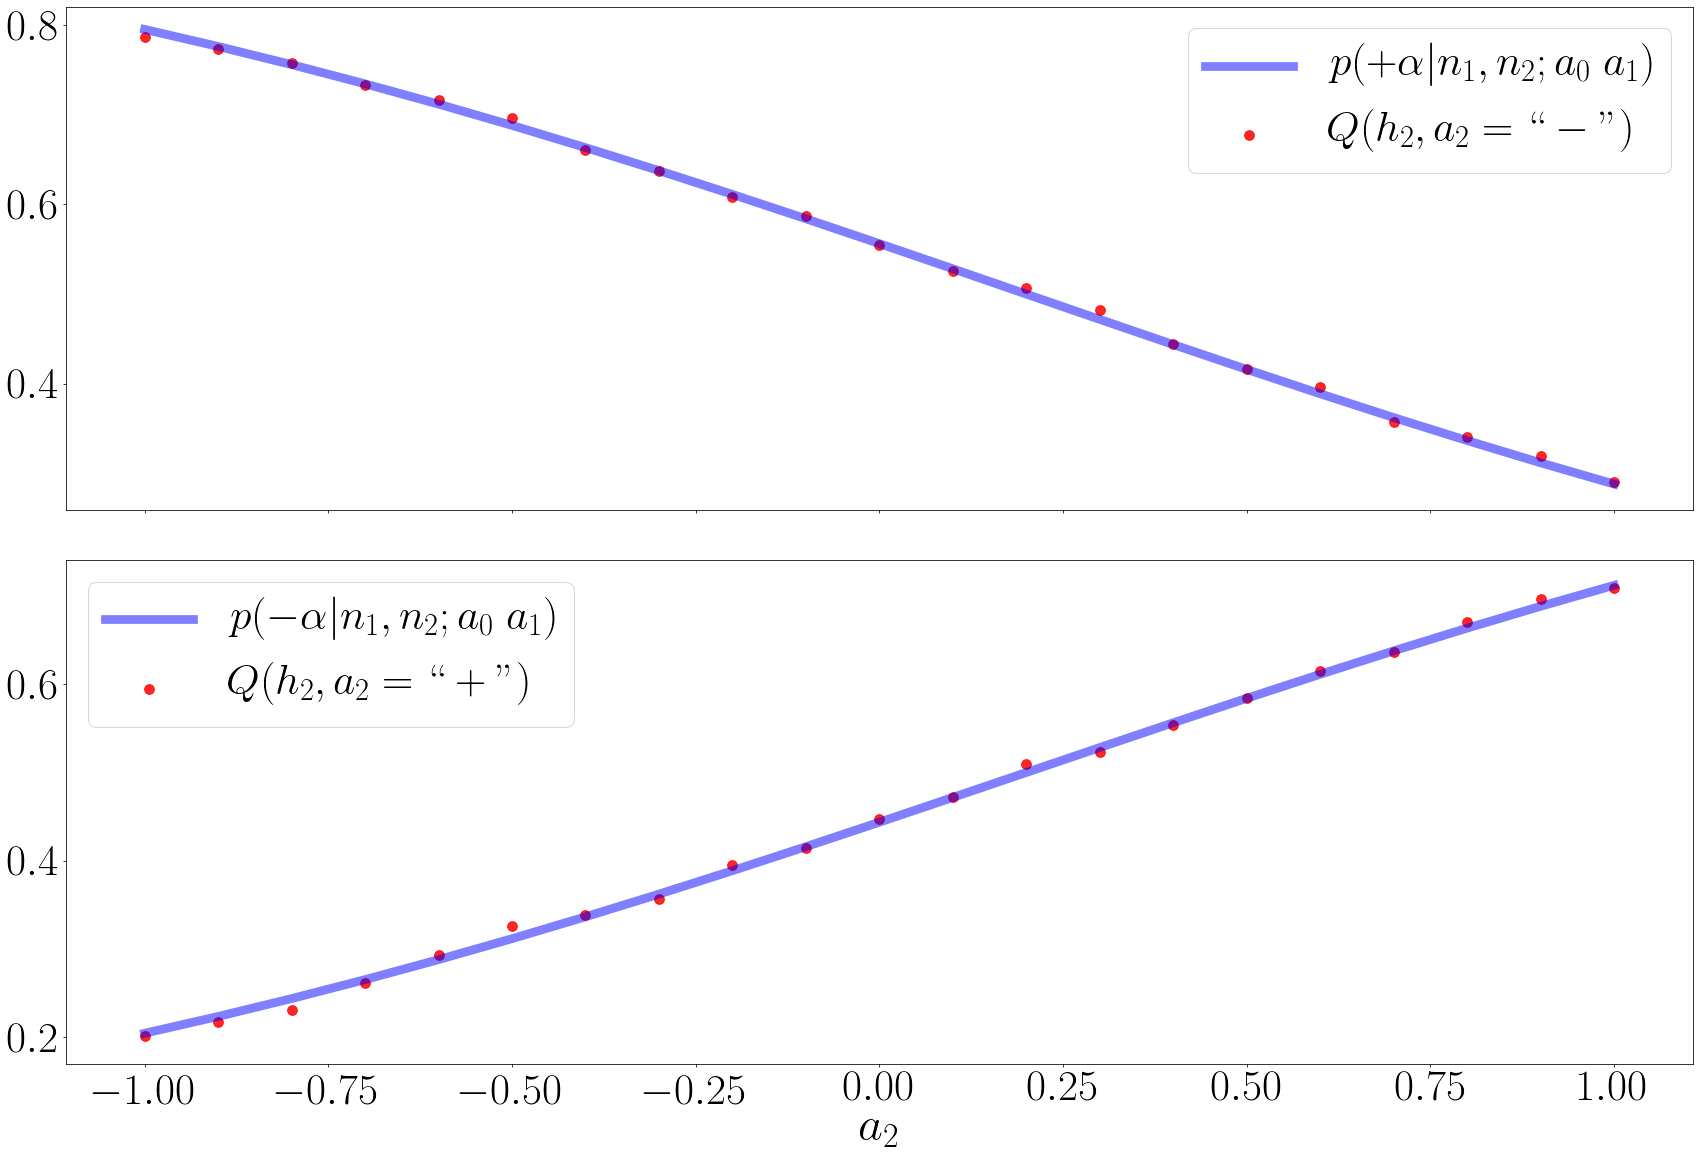

In [42]:
import matplotlib
matplotlib.rc('font', serif='cm10')
matplotlib.rc('text', usetex=True)
axinticks=[]
plt.rcParams.update({'font.size': 45})

plt.figure(figsize=(30,20),dpi=70)
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))
ax1.plot(bb.actions,func(bb.actions,sgn="plus"), '-',linewidth=9, alpha=0.5, color="blue",label=r'$p(+\alpha|n_1, n_2; a_0 \; a_1) $')
ax2.plot(bb.actions,func(bb.actions,sgn="minus"), '-',linewidth=9, alpha=0.5, color="blue",label=r'$p(-\alpha|n_1, n_2; a_0 \; a_1) $')

ax1.scatter(bb.actions,guess[0,0,l0most,:,0],s=100,alpha=0.85,color="red",label=r'$Q(h_2, a_2=``-")$')
ax2.scatter(bb.actions,guess[0,0,l0most,:,1],s=100,alpha=0.85,color="red", label=r'$Q(h_2, a_2=``+")$')
ax1.legend()
ax2.legend()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
ax2.set_xlabel(r'$a_2$',size=50)
#ax1.set_ylabel("Q(h_2,a(h_2)=+)")
#ax2.set_ylabel("Q(h_2,a(h_2)=+)")
plt.savefig("qprofguess.pdf")

In [ ]:
def func0(label1, sgn="plus", n1=0, n2=0):
    p=0
    for n1 in [0,1]:
        for beta2 in np.arange(-1,1,.01)
        for n2 in [0,1]:
            pos.append(max([bb.P(ph*exp.amplitude, bb.actions[label1], np.cos(bb.at[0]),n1)*bb.P(ph*exp.amplitude, beta2, np.sin(bb.at[0]),n2)
                     for ph in[-1,1]]))
    pn1n2menos = bb.P(-exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),0)*bb.P(-exp.amplitude, beta2, np.sin(bb.at[0]),n2)
    norm=0
    for ph in [-1,1]:
        norm += bb.P(ph*exp.amplitude, bb.actions[l0most], np.cos(bb.at[0]),n1)*bb.P(ph*exp.amplitude, beta2, np.sin(bb.at[0]),n2)
    if sgn=="plus":
        return pn1n2mas/norm
    else:
        return pn1n2menos/norm

In [ ]:
import matplotlib
matplotlib.rc('font', serif='cm10')
matplotlib.rc('text', usetex=True)
axinticks=[]
plt.rcParams.update({'font.size': 45})

plt.figure(figsize=(30,20),dpi=70)
ax1 = plt.subplot2grid((1,0),(0,0))
ax1.plot(bb.actions,func0(bb.actions,sgn="plus"), '-',linewidth=9, alpha=0.5, color="blue",label=r'$p(+\alpha|n_1, n_2; a_0 \; a_1) $')

ax1.scatter(bb.actions,guess[0,0,l0most,:,0],s=100,alpha=0.85,color="red",label=r'$Q(h_2, a_2=``-")$')
ax2.scatter(bb.actions,guess[0,0,l0most,:,1],s=100,alpha=0.85,color="red", label=r'$Q(h_2, a_2=``+")$')
ax1.legend()
ax2.legend()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
ax2.set_xlabel(r'$a_2$',size=50)
#ax1.set_ylabel("Q(h_2,a(h_2)=+)")
#ax2.set_ylabel("Q(h_2,a(h_2)=+)")
plt.savefig("qprofguess.pdf")